<a href="https://colab.research.google.com/github/lustraka/Data_Analysis_Workouts/blob/main/Communicate_Data_Findings/SandBox/Diamonds-Case-Study-Explore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diamond Case Study

In [1]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read the csv file, and check its shape and head
path = 'https://github.com/lustraka/Data_Analysis_Workouts/raw/main/Communicate_Data_Findings/SandBox/'

# Load in the dataset into a pandas dataframe
diamonds = pd.read_csv(path + 'diamonds.csv')

## Dataset Overview

Before running straight into the exploration, let's just take a moment to get a high-level overview of the dataset. We can refer back to these points if we need to get our bearings on what we should expect to see from each variable.

In [2]:
# Show high-level overview of data shape and composition
print(diamonds.shape)
print(diamonds.dtypes)
diamonds.head(10)

(53940, 10)
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [3]:
# Show descriptive statistics for numeric variables
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


**Variable descriptions**:

Variable | Description
- | -
price| Price in dollars. Data were collected in 2008.
carat| Diamond weight. 1 carat is equal to 0.2 grams.
cut| Quality of diamond cut, affects its shine. Grades go from (low) Fair, Good, Very Good, Premium, Ideal (best).
color| Measure of diamond coloration. Increasing grades go from (some color) J, I, H, G, F, E, D (colorless).
clarity| Measure of diamond inclusions. Increasing grades go from (inclusions) I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF (internally flawless).
x, y, z|  Diamond length, width, and depth, respectively, in mm.
table| Ratio of the width of the top face of diamond to its overall width, as a percentage.
depth | Proportional depth of the diamond, as a percentage. This is computed as 2 * z / (x + y), or the ratio of the depth to the average of length and width.

In [4]:
# Convert `cut`, `color`, `clarity` to ordered categorical dtype
for var in ['cut', 'color', 'clarity']:
  print(var, ':', diamonds[var].unique())

cut : ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
color : ['E' 'I' 'J' 'H' 'F' 'G' 'D']
clarity : ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [5]:
cato = {
    'cut': ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'],
    'color' : ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
    'clarity' : ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
}
for k, v in cato.items():
  diamonds[k] = diamonds[k].astype(pd.CategoricalDtype(categories=v, ordered=True))

diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


## Univariate Exploration

Let's start our exploration by looking at the main variable of interest: price. Is the distribution skewed or symmetric? Is it unimodal or multimodal?

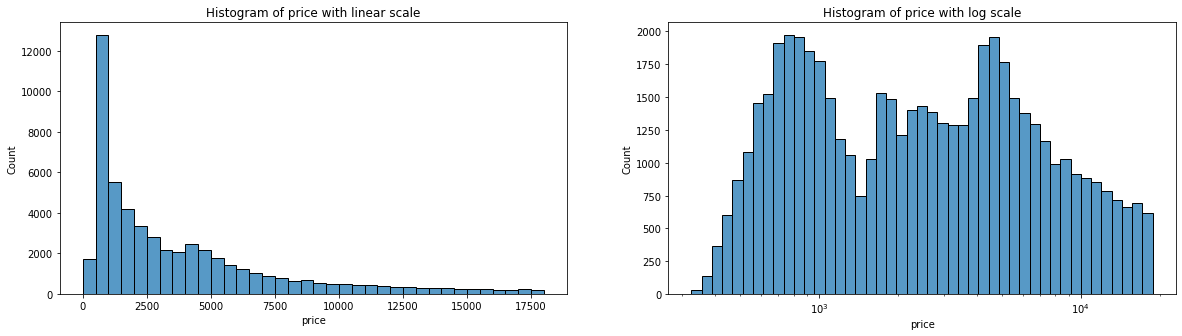

In [13]:
# Univariate plot of diamond prices
fig, axs = plt.subplots(1, 2, figsize=(20,5))
bins = np.arange(0, 18001, 500)
sns.histplot(diamonds['price'], bins=bins, ax=axs[0])
axs[0].set_title("Histogram of price with linear scale")

sns.histplot(diamonds['price'], log_scale=True, ax=axs[1])
axs[1].set_title('Histogram of price with log scale')
plt.show()

> Throughout this case study, you'll see comments in Markdown cells like the one below, where the text has been colored in white. Unlike the exercises in earlier lessons, a reference plot will not be provided: you'll need to assess on your own whether or not your plot matches the comments. To view these comments, you can either highlight the text, or double click the Markdown cell. Remove or change the 'color=white' style on the text to un-spoiler the commentary.

Price distribution comment 1: <span style="color:white">You should create a histogram for price, since it is a numeric variable. Your initial plots should show that diamond price follows a highly skewed distribution. If you haven't tried a log scaling, then try that now.</span>

Price distribution comment 2: <span style="color:white">Under a log scale, you should see that the data is roughly bimodal, with one large peak somewhere between 500 and 1000, and a second large peak between 4 and 5 thousand. The price distribution also seems to just cut off at its maximum, rather than declining in a smooth tail.</span>

Next, create a plot of our first diamond 'C' metric: carat weight. Is there an interesting pattern in these values?


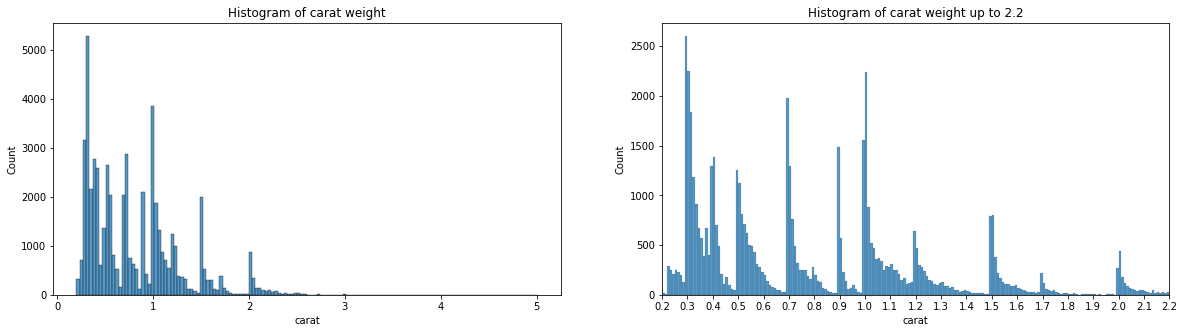

In [20]:
# Univariate plot of carat weights
# Univariate plot of diamond prices
fig, axs = plt.subplots(1, 2, figsize=(20,5))
sns.histplot(diamonds['carat'], ax=axs[0])
axs[0].set_title('Histogram of carat weight')

bins = np.arange(0.2, 5.3, 0.01)
sns.histplot(diamonds['carat'], bins=bins, ax=axs[1])
ticks=np.arange(0.2, 5.3, 0.1)
axs[1].set_xticks(ticks)
axs[1].set_xlim(0.2, 2.2)
axs[1].set_title('Histogram of carat weight up to 2.2')

plt.show()

Carat distribution comment: <span style="color:white">You should see an interesting pattern in carat weights, where there is a large spike around a single decimal value, then a gradual tailing off to the right until the next spike. In this case, it's a good idea to set the bin size small (e.g. 0.01) and zoom into a narrower range of values to clearly see the spikes in the data values. Perhaps these spikes come about as part of standard diamond size conventions?</span>

Now, let's move on to exploring the other three 'C' quality measures: cut, color, and clarity. For each of these measures, does the data we have tend to be higher on the quality scale, or lower?

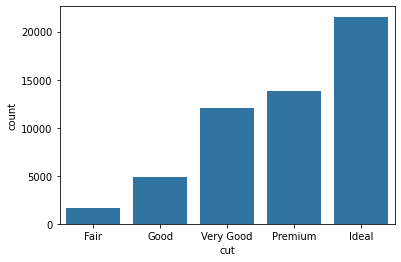

In [27]:
# Choose the first tuple of RGB colors
base_color = sns.color_palette()[0]

# Univariate plots of cut, color, and clarity grades
sns.countplot(data=diamonds, x='cut', color=base_color);

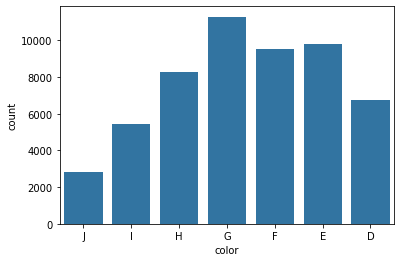

In [28]:
sns.countplot(data=diamonds, x='color', color=base_color);

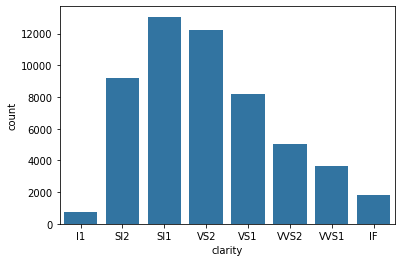

In [29]:
sns.countplot(data=diamonds, x='clarity', color=base_color);

General categorical feature comment: <span style="color:white">Since these features are categorical, you should be producing bar charts here. In addition, since they're ordinal in nature, the bars should be sorted in order of increasing quality level. Check the previous page if you need documentation on how the scales are set up, since they're not completely intuitive!</span>

Cut distribution comment: <span style="color:white">The bar chart should show that the mode cut quality for diamonds in this dataset is the highest grade, Ideal. There is a consistent decrease in number of diamonds of lower cut grades.</span>

Color distribution comment: <span style="color:white">The distribution is roughly unimodal, with the most common color grade in this dataset belonging to the central grade represented, G. (There are other diamond grades that are worse than J, but they're not part of the collected data.)</span>

Clarity distribution comment: <span style="color:white">There is a right-skew in the clarity grades represented in the dataset, with most of the diamonds collected having slight or very slight inclusions (SI2, SI1, VS2, VS1). There are very few diamonds with visible inclusions (I1).</span>

## Bivariate Exploration

In the previous part, you looked at the univariate distribution of five features in the diamonds dataset: price, carat, cut, color, and clarity. Now, we'll investigate relationships between pairs of these variables, particularly how each of them relate to diamond price.

To start, construct a plot of the price against carat weight. What kind of shape does the relationship between these variables take?

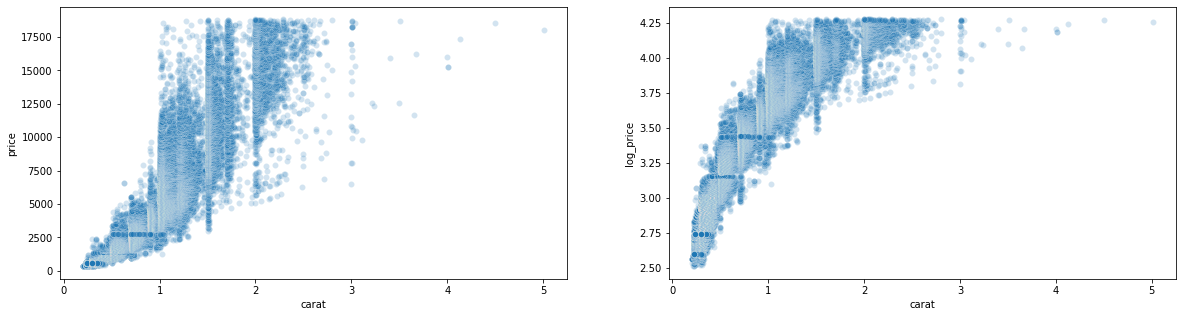

In [35]:
# Bivariate plot of price vs. carat
diamonds['log_price'] = diamonds.price.apply(np.log10)

# Resize the chart (size in inches)
plt.figure(figsize=[20, 5])

# Histogram on left
plt.subplot(1, 2, 1)
sns.scatterplot(data=diamonds, x='carat', y='price', alpha=0.2);

# Histogram on righ
plt.subplot(1, 2, 2)
sns.scatterplot(data=diamonds, x='carat', y='log_price', alpha=0.2);


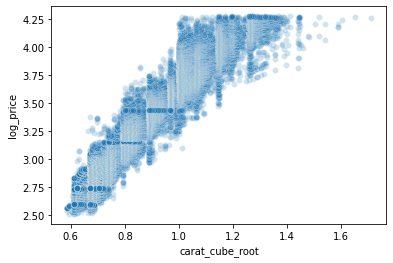

In [37]:
diamonds['carat_cube_root'] = diamonds['carat'].apply(np.cbrt)
sns.scatterplot(data=diamonds, x='carat_cube_root', y='log_price', alpha=0.2);

Price vs. Carat comment 1: <span style="color:white">Since these are both numeric variables, a scatterplot is a natural choice. You might also consider a heat map for this task. In either case, you should recall that the price distribution suggests a logarithmic transformation due to its very long tail. If you haven't tried it yet, add a transformation to the price axis.</span>

Price vs. Carat comment 2: <span style="color:white">Assuming that you put price on the y-axis and carat on the x-axis, the transformation should have changed the scatterplot from looking concave upwards (like an upwards-pointing bowl) to concave downards (like a downwards-pointing bowl). It would be nice to have a linear trend, wouldn't it? It turns out that the x, y, and z dimensions track a much more linear trend against price than carat does. Since carat is more recognizable a feature value, let's add a transformation to the x-axis to see the approximately linear trend. Since weight is proportional to volume, and since all the diamonds are cut in approximately the same way (round-cut), a cube-root transformation of carat should allow us to see an approximately linear trend.</span>

Price vs. Carat comment 3: <span style="color:white">One thing that you might notice in the visualization after transformation is that the trend between price and carat weight is 'cut off' by the maximum price limit of diamonds available in the dataset. For diamonds above about 1.5 carats, we'd probably expect some diamonds about $20,000 in price, given the trend below 1.5 carats. This would be a point to potentially pay attention to later on with interaction effects between other factors, and when building a model of diamond prices.</span>

Now let's take a look at the relationship between price and the three categorical quality features, cut, color, and clarity. Are there any surprising trends to be seen here?

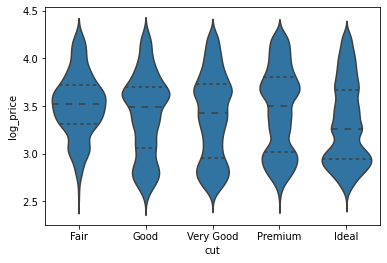

In [41]:
# bivariate plots of price vs. cut, color, clarity
sns.violinplot(data=diamonds, x='cut', y='log_price', color=base_color, inner='quartile');

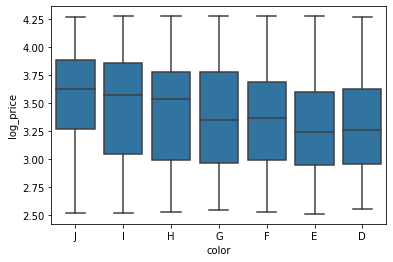

In [42]:
sns.boxplot(data=diamonds, x='color', y='log_price', color=base_color);

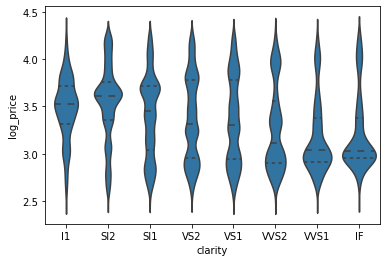

In [43]:
sns.violinplot(data=diamonds, x='clarity', y='log_price', color=base_color, inner='quartile');

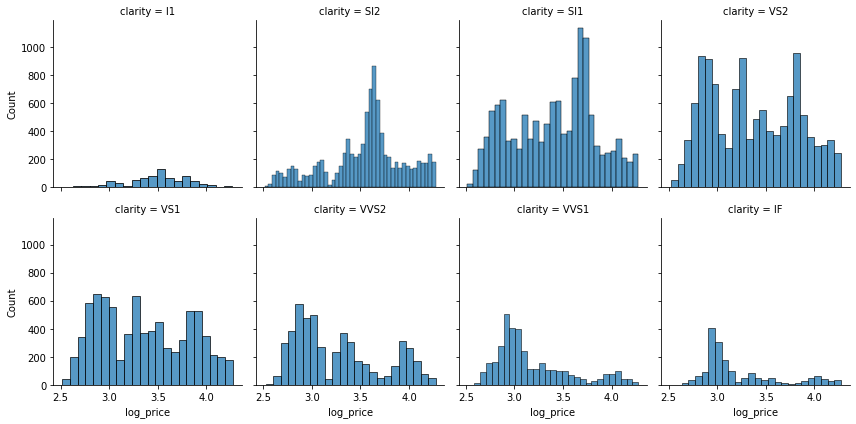

In [45]:
g = sns.FacetGrid(data=diamonds, col='clarity', col_wrap=4)
g.map(sns.histplot, 'log_price');

Price vs. Categorical comment 1: <span style="color:white">There's a lot of different approaches you could have taken here. If you created a box plot, then you probably noticed something interesting and unintuitive: the median price of diamonds should tend to look like it _decrease_ with _increasing_ gem quality. Shouldn't we expect this to be the other way around? This deserves a deeper look. Is there a different plot type to choose that shows more details in the data?</span>

Price vs. Categorical comment 2: <span style="color:white">With a violin plot, you can get more insight into what causes the trend in median prices to appear as it does. Faceted histograms will also produce a similar result, though unless the faceting keeps the price axis common across facets, the trend will be harder to see. For each ordinal variable, there are multiple modes into which prices appear to fall. Going across increasing quality levels, you should see that the modes rise in price - this should be the expected effect of quality. However, you should also see that more of the data will be located in the lower-priced modes - this explains the unintuitive result noted in the previous comment. This is clearest in the clarity variable. Let's keep searching the data to see if there's more we can say about this pattern.</span>

Before we complete the bivariate exploration, we should take a look at some of the relationships between the independent variables. Namely, how does carat weight change across the other three 'C' quality measures? You can take the same approach as the above investigation of price against the three categorical quality measures. What can you see in these plots, and how does this relate to your earlier investigations?

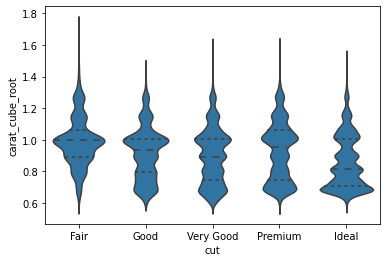

In [47]:
# bivariate plots of carat vs. cut, color, clarity
sns.violinplot(data=diamonds, x='cut', y='carat_cube_root', color=base_color, inner='quartile');

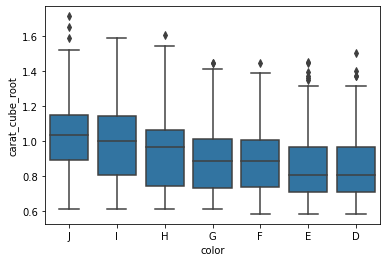

In [48]:
sns.boxplot(data=diamonds, x='color', y='carat_cube_root', color=base_color);

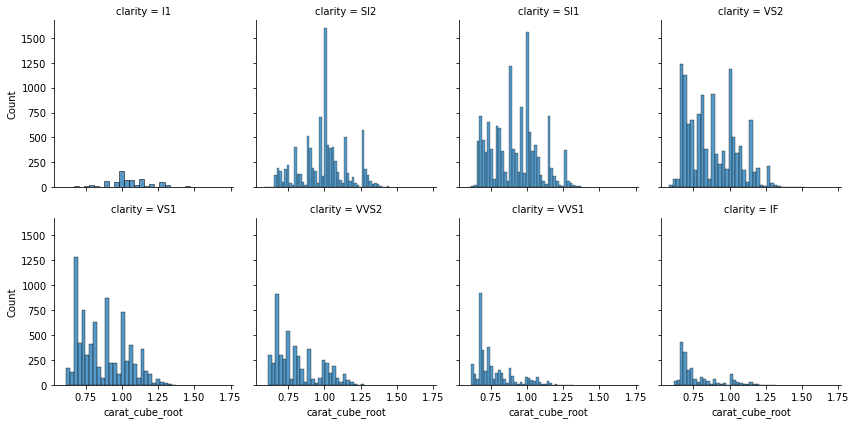

In [49]:
g = sns.FacetGrid(data=diamonds, col='clarity', col_wrap=4)
g.map(sns.histplot, 'carat_cube_root');

Carat vs. Categorical comment: <span style="color:white">These plots should shed a lot more light into the patterns already seen. Larger diamonds are more likely to receive lower categorical quality grades, while high quality grades are more likely to have their numbers made up of smaller diamonds. Since carat weight appears to be a major driver of price, this helps to explain the surprising marginal effect of diamond quality against price. The challenge next will be on how to depict this in a multivariate plot.</span>

## Multivariate Exploration

In the previous section, you looked at various bivariate relationships. You saw that the log of price was approximately linearly related to the cube root of carat weight, as analogy to its length, width, and depth. You also saw that there was an unintuitive relationship between price and the categorical quality measures of cut, color, and clarity, that the median price decreased with increasing quality. Investigating the distributions more clearly and looking at the relationship between carat weight with the three categorical variables showed that this was due to carat size tending to be smaller for the diamonds with higher categorical grades.

The goal of this section will be to depict these interaction effects through the use of multivariate plots.

To start off with, create a plot of the relationship between price, carat, and clarity. In the previous section, you saw that clarity had the clearest interactions with price and carat. How clearly does this show up in a multivariate visualization?

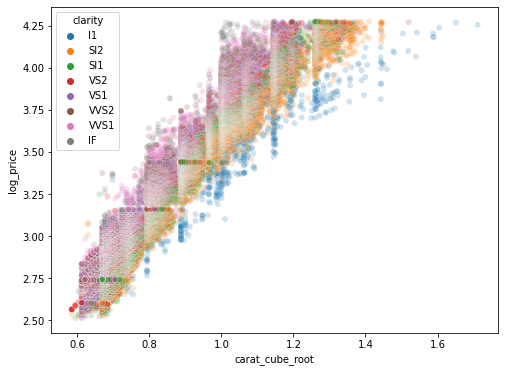

In [51]:
# multivariate plot of price by carat weight, and clarity
plt.figure(figsize=(8,6))
sns.scatterplot(data=diamonds, x='carat_cube_root', y='log_price', hue='clarity', alpha=0.2)
plt.show()

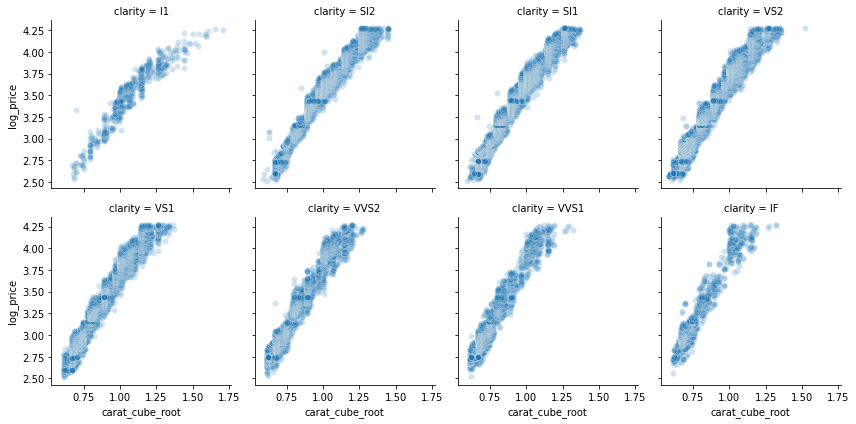

In [53]:
g = sns.FacetGrid(data=diamonds, col='clarity', col_wrap=4)
g.map(sns.scatterplot, 'carat_cube_root', 'log_price', alpha=0.2);

Price by Carat and Clarity Comment 1: <span style="color:white">With two numeric variables and one categorical variable, there are two main plot types that make sense. A scatterplot with points colored by clarity level makes sense on paper, but the sheer number of points causes overplotting that suggests a different plot type. A faceted scatterplot or heat map is a better choice in this case.</span>

Price by Carat and Clarity Comment 2: <span style="color:white">You should see across facets the general movement of the points upwards and to the left, corresponding with smaller diamond sizes, but higher value for their sizes. As a final comment, did you remember to apply transformation functions to the price and carat values?</span>

Let's try a different plot, for diamond price against cut and color quality features. To avoid the trap of higher quality grades being associated with smaller diamonds, and thus lower prices, we should focus our visualization on only a small range of diamond weights. For this plot, select diamonds in a small range around 1 carat weight. Try to make it so that your plot shows the effect of each of these categorical variables on the price of diamonds.

In [55]:
diamonds.query('carat > 0.9 and carat < 1.1').shape

(8568, 12)

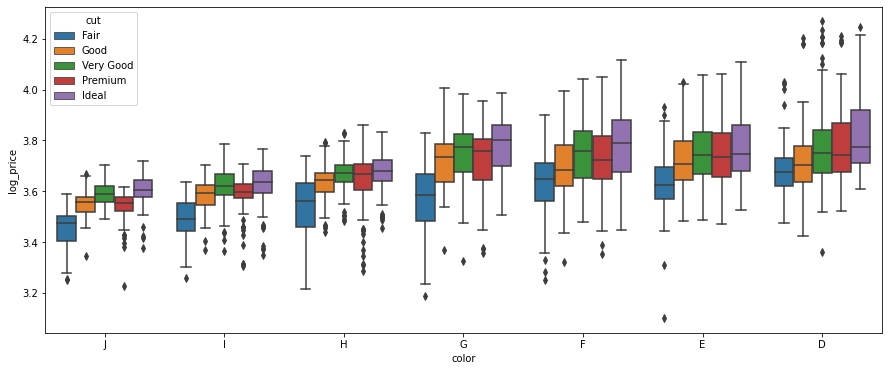

In [68]:
# multivariate plot of price by cut and color, for approx. 1 carat diamonds
plt.figure(figsize=(15,6))
sns.boxplot(data=diamonds.query('carat > 0.95 and carat < 1.05'), x='color', y='log_price', 
                hue='cut')
plt.show()

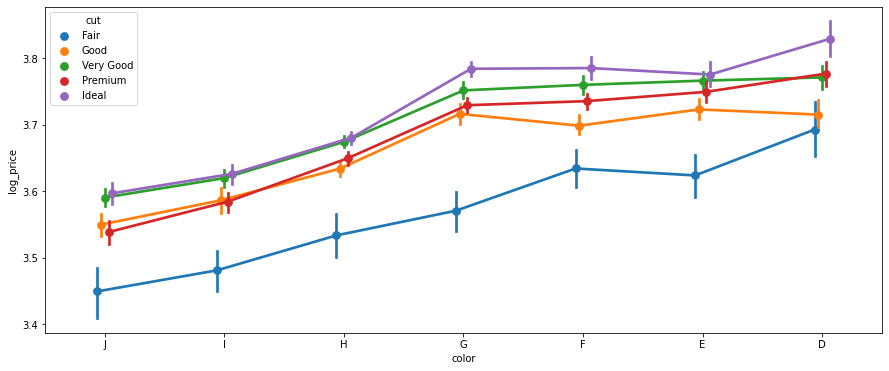

In [76]:
plt.figure(figsize=(15,6))
sns.pointplot(data=diamonds.query('carat > 0.95 and carat < 1.05'), x='color', y='log_price', 
                hue='cut', dodge=True)
plt.show()

Price by Cut and Color Comment 1: <span style="color:white">There's a lot of ways that you could plot one numeric variable against two categorical variables. I think that the clustered box plot or the clustered point plot are the best choices in this case. With the number of category combinations to be plotted (7x5 = 35), it's hard to make full sense of a violin plot's narrow areas; simplicity is better. A clustered bar chart could work, but considering that price should be on a log scale, there isn't really a nice baseline that would work well.</span>

Price by Cut and Color Comment 2: <span style="color:white">Assuming you went with a clustered plot approach, you should see a gradual increase in price across the main x-value clusters, as well as generally upwards trends within each cluster for the third variable. Aesthetically, did you remember to choose a sequential color scheme for whichever variable you chose for your third variable, to override the default qualitative scheme? If you chose a point plot, did you set a dodge parameter to spread the clusters out? </span>